## Assignment 2
In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

Part 1 - Regression
First, run the following block to set up the variables needed for later sections.

<IPython.core.display.Javascript object>


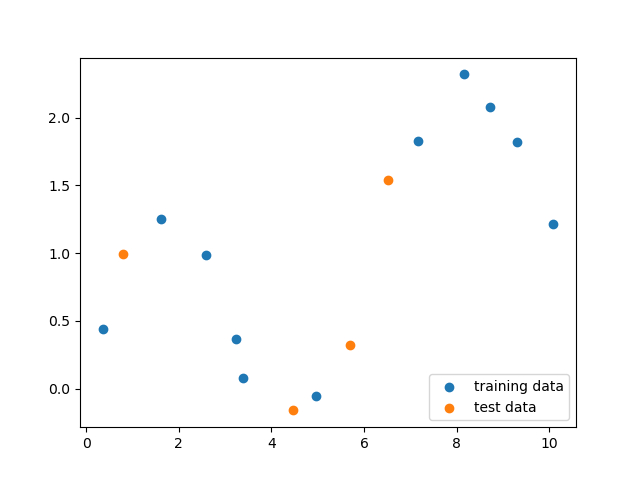

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
# NOTE: Uncomment the function below to visualize the data, but be sure 
# to **re-comment it before submitting this assignment to the autograder**.   
part1_scatter()

In [24]:
X_test  # these must be reshaped into one-dimensional arrays

array([0.79431716, 4.47573197, 5.69364194, 6.51069113])

In [25]:
X_train

array([10.08877265,  3.23065446,  1.62431903,  9.31004929,  7.17166586,
        4.96972856,  8.14799756,  2.59103578,  0.35281047,  3.375973  ,
        8.72363612])

In [26]:
y_test

array([ 0.99517935, -0.16081   ,  0.3187423 ,  1.53763897])

In [27]:
y_train

array([ 1.21213026,  0.36408873,  1.24877201,  1.81942995,  1.82595557,
       -0.05233879,  2.31966323,  0.98630796,  0.43770571,  0.07512287,
        2.08031157])

In [2]:
X_test.shape

(4,)

In [3]:
X_train.shape

(11,)

In [4]:
y_test.shape

(4,)

In [5]:
y_train.shape

(11,)

In [6]:
X_train.reshape(11,1)

array([[10.08877265],
       [ 3.23065446],
       [ 1.62431903],
       [ 9.31004929],
       [ 7.17166586],
       [ 4.96972856],
       [ 8.14799756],
       [ 2.59103578],
       [ 0.35281047],
       [ 3.375973  ],
       [ 8.72363612]])

In [23]:
X_test.reshape(4,1)

array([[0.79431716],
       [4.47573197],
       [5.69364194],
       [6.51069113]])

## Question 1
Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

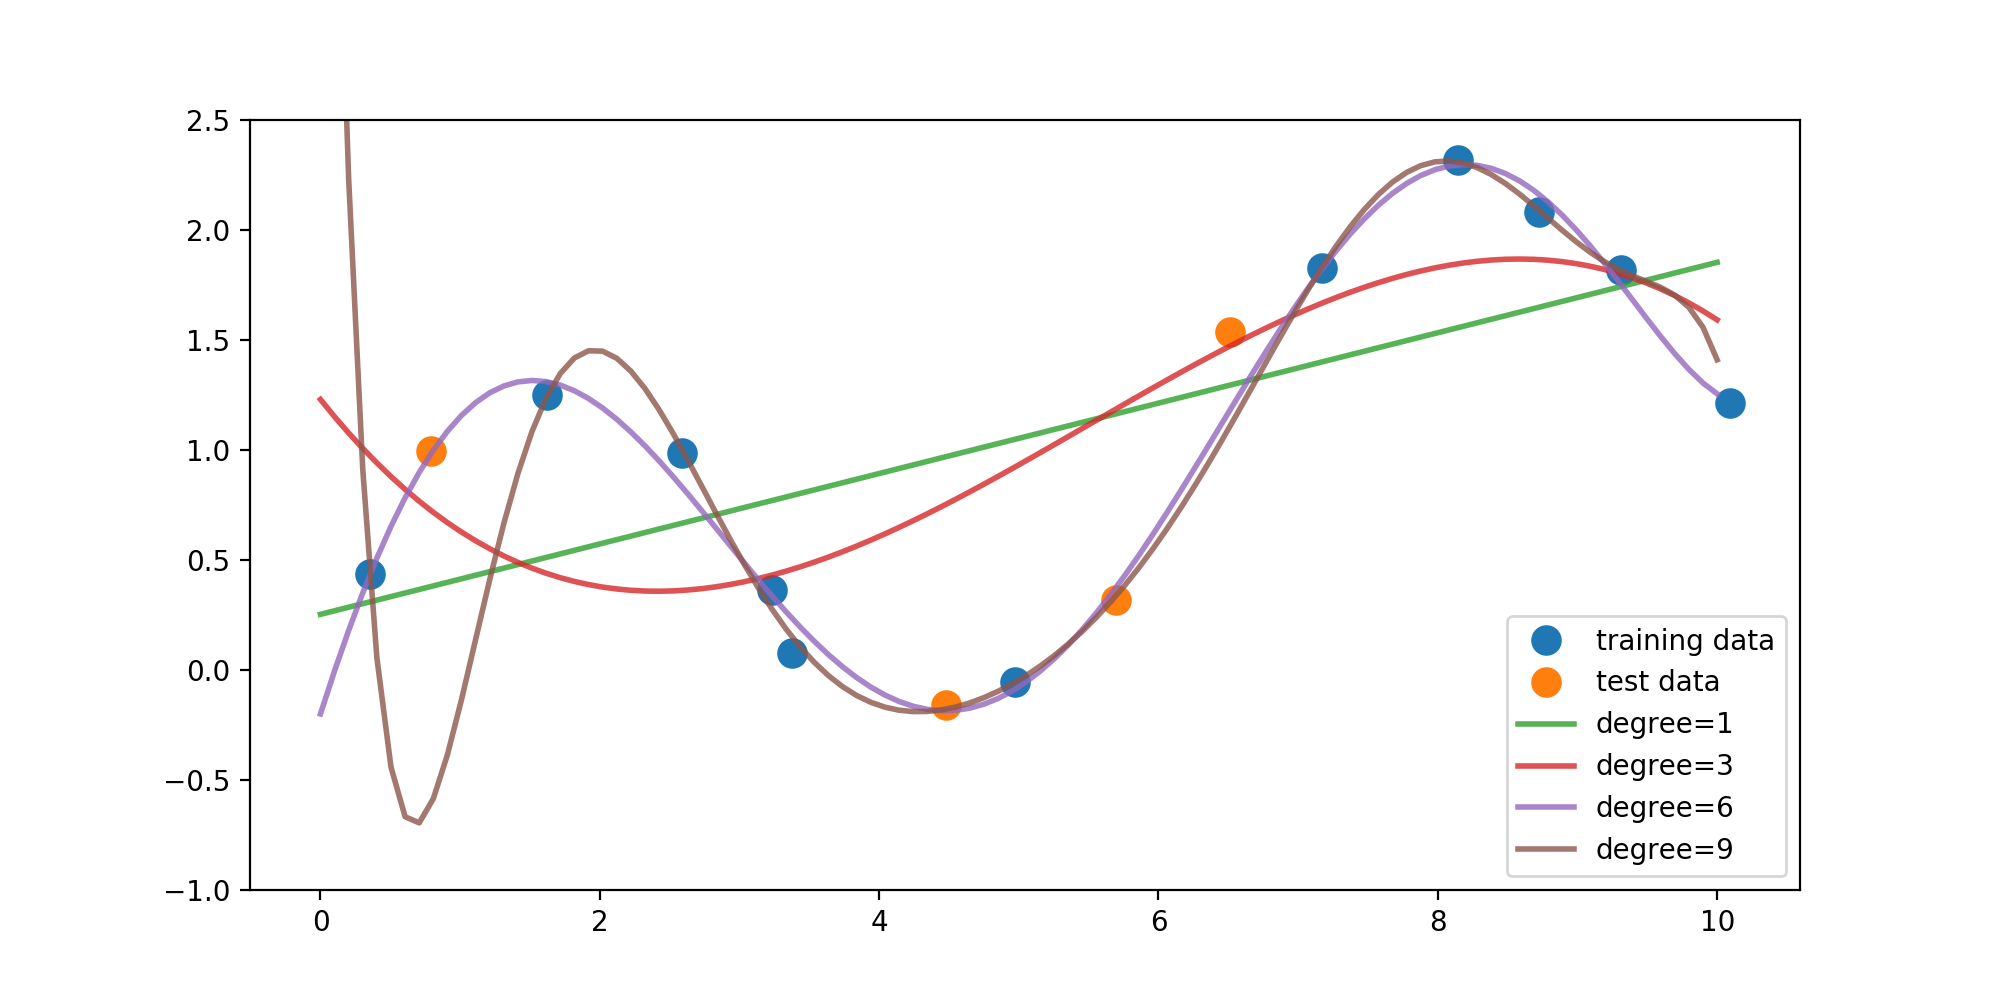

The figure above shows the fitted models plotted on top of the original data (using plot_one()).


This function should return a numpy array with shape (4, 100)

You will need four models here. Degree 1. Degree 3. Degree 6. Degree 9. Create a list of degrees.
You will also need four arrays of 100 zeros to be replaced with the predicted values. Start with a np.zeros list with 4 arrays.
For each of the input values, you will need an evenly spaced array of 100 values between 0 and 10.

In [8]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # Your code here
    lr = LinearRegression()  # sets up linear regression model
    pred = np.zeros((4,100))  # returns an array of four lists with 100 zeros(see below)
    X_input = np.linspace(0,10,100)  # returns an evenly spaced array of 100 numbers between 0 and 10 (see below)
    degree = [1,3,6,9]  # just a list of the degrees you want(will iterate over these numbers)
    for i in range(len(degree)):  #  calls the degree list
        py = PolynomialFeatures(degree[i]) # sets up polynomial features algo for each number of the degree
        X_train_py = py.fit_transform(X_train[None].T) # transforms X_train numbers into numbers between 0 and 1
        X_input_py = py.fit_transform(X_input[None].T) # transforms X_input numbers into numbers between 0 and 1
        lr.fit(X_train_py, y_train) # fits the training data
        pred[i,:] = lr.predict(X_input_py) # predicts the model into a list iterating over the degree numbers
    return pred
answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

In [9]:
# Alternate answer_one() easier to understand
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    res = np.zeros((4,100)) # sets the result to be an array of four lists with 100 results appended
    for i, degree in enumerate([1,3,6,9]): # creates a degree list and a value[i] for the results
        poly = PolynomialFeatures(degree = degree) # calls the polynomial function with the degrees set to the degree list
        X_poly = poly.fit_transform(X_train.reshape(11,1)) # transforms the training data and reshapes it into an array
        # of one column
        linreg = LinearRegression().fit(X_poly, y_train) # fits the linear regression model
        y = linreg.predict(poly.fit_transform(np.linspace(0,10,100).reshape(100,1))); 
        # predicts the model, transforms each degree result into evenly spaced array between 0 and 1, then
        # reshapes each array into one column each. That way we can easily plot these numbers
        res[i,:] = y # takes the result(np.zeros) and appends to y results
        
    return res

answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

In [10]:
p = np.zeros((4,100))
p

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [11]:
X_input = np.linspace(0,10,100)
X_input

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

<IPython.core.display.Javascript object>


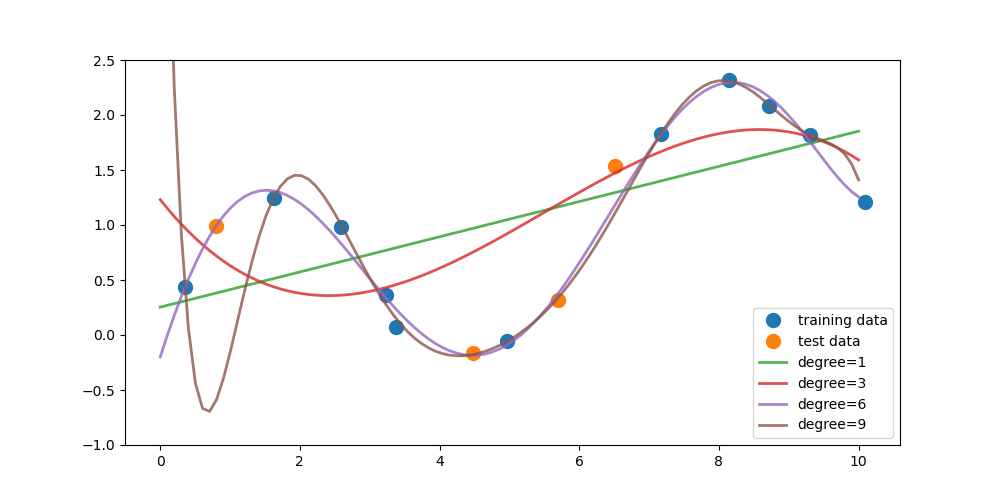

In [22]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

## Question 2
Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 0 through 9. For each model compute the  R2R2  (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

This function should return one tuple of numpy arrays (r2_train, r2_test). Both arrays should have shape (10,)

In [13]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score
    r2_test = []
    r2_train = []

    # Your code here
    degree = [1,2,3,4,5,6,7,8,9,10]
    for i in range(len(degree)):
        poly = PolynomialFeatures(degree[i])
        X_poly = poly.fit_transform(X_train[None].T)
        X_poly2 = poly.fit_transform(X_test[None].T)
        linreg = LinearRegression().fit(X_poly, y_train)
        r2_train.append(linreg.score(X_poly, y_train))
        r2_test.append(linreg.score(X_poly2, y_test))
        
        

    return (r2_train, r2_test)

answer_two()

([0.4292457781234663,
  0.45109980444082465,
  0.5871995368779851,
  0.9194194471769322,
  0.9757864143068231,
  0.9901823324795106,
  0.9935250927840485,
  0.9963754538774657,
  0.998037062558846,
  0.9999999729724003],
 [-0.45237104233936676,
  -0.0685698414991589,
  0.005331052945724779,
  0.7300494281871364,
  0.8770830091760922,
  0.9214093981400954,
  0.9202150413075033,
  0.6324794391937826,
  -0.6452567437514476,
  -38.85939685519426])

In [14]:
# Answer two alternate method
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    from sklearn.preprocessing import PolynomialFeatures
    r2_train = np.zeros(10)
    r2_test = np.zeros(10)
    for i in range(10):
        poly = PolynomialFeatures(degree = i)
        # Train and score X_train
        X_poly = poly.fit_transform(X_train.reshape(11,1))
        linreg = LinearRegression().fit(X_poly, y_train)
        r2_train[i] = linreg.score(X_poly, y_train);
        
        # Score X_test(do not train)
        X_test_poly = poly.fit_transform(X_test.reshape(4,1))
        r2_test[i] = linreg.score(X_test_poly, y_test)
        
    return (r2_train, r2_test)
    
answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247944, -0.64525674]))

## Question 3
Based on the  R2R2  scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset?

Hint: Try plotting the  R2R2  scores from question 2 to visualize the relationship between degree level and  R2R2 . Remember to comment out the import matplotlib line before submission.

This function should return one tuple with the degree values in this order: (Underfitting, Overfitting, Good_Generalization). There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3).

In [15]:
def answer_three():
    r2_scores = answer_two()
    df = pd.DataFrame({"Training Score": r2_scores[0], "Testing Score": r2_scores[1]})
    df["diff"] = df["Training Score"] - df["Testing Score"]
    df = df.sort_values(["diff"])
    Good_generalization = df.index[0]
    df = df.sort_values(["diff"], ascending = False)
    Overfitting = df.index[0]
    df = df.sort_values(["Training Score"])
    Underfitting = df.index[0]
    return (Underfitting, Overfitting, Good_generalization)
answer_three()

(0, 9, 6)

## Question 4
Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters alpha=0.01, max_iter=10000) both on polynomial features of degree 12. Return the  R2R2  score for both the LinearRegression and Lasso model's test sets.

This function should return one tuple (LinearRegression_R2_test_score, Lasso_R2_test_score)

In [34]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score

    poly1 = PolynomialFeatures(degree = 12)
    X_train_py = poly1.fit_transform(X_train.reshape(11,1))
    X_test_py = poly1.fit_transform(X_test.reshape(4,1))
    linreg = LinearRegression().fit(X_train_py, y_train)
    lr_test = linreg.score(X_test_py, y_test)
    
    lasso = Lasso(alpha = 0.01, max_iter = 10000).fit(X_train_py, y_train)
    l_test = lasso.score(X_test_py, y_test)

    # Your code here

    return (lr_test, l_test)
answer_four()

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(


(-4.31198258293269, 0.8406625614750246)

## Part 2 - Classification
Here's an application of machine learning that could save your life! For this section of the assignment we will be working with the UCI Mushroom Data Set stored in readonly/mushrooms.csv. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

Attribute Information:

cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
bruises?: bruises=t, no=f
odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
gill-attachment: attached=a, descending=d, free=f, notched=n
gill-spacing: close=c, crowded=w, distant=d
gill-size: broad=b, narrow=n
gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
stalk-shape: enlarging=e, tapering=t
stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
veil-type: partial=p, universal=u
veil-color: brown=n, orange=o, white=w, yellow=y
ring-number: none=n, one=o, two=t
ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d


The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables.

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('C:/Users/Administrator/OneDrive/Documents/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2

In [18]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier

    # Your code here
    clf = DecisionTreeClassifier(random_state = 0).fit(X_train2,  y_train2)
    feature_imp = []
    for index, imp in enumerate(clf.feature_importances_):
        feature_imp.append([imp, X_train2.columns[index]])
    feature_imp.sort(reverse = True)
    feature_imp = np.array(feature_imp)
    feature_imp = feature_imp[:5,1]
    feature_imp = feature_imp.tolist()
    

    return feature_imp# Your answer here
answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

## Question 6
For this question, we're going to use the validation_curve function in sklearn.model_selection to determine training and test scores for a Support Vector Classifier (SVC) with varying parameter values. Recall that the validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

Because creating a validation curve requires fitting multiple models, for performance reasons this question will use just a subset of the original mushroom dataset: please use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.

The initialized unfitted classifier object we'll be using is a Support Vector Classifier with radial basis kernel. So your first step is to create an SVC object with default parameters (i.e. kernel='rbf', C=1) and random_state=0. Recall that the kernel width of the RBF kernel is controlled using the gamma parameter.

With this classifier, and the dataset in X_subset, y_subset, explore the effect of gamma on classifier accuracy by using the validation_curve function to find the training and test scores for 6 values of gamma from 0.0001 to 10 (i.e. np.logspace(-4,1,6)). Recall that you can specify what scoring metric you want validation_curve to use by setting the "scoring" parameter. In this case, we want to use "accuracy" as the scoring metric.

For each level of gamma, validation_curve will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

Find the mean score across the three models for each level of gamma for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

array([[ 0.5,  0.4,  0.6],
       [ 0.7,  0.8,  0.7],
       [ 0.9,  0.8,  0.8],
       [ 0.8,  0.7,  0.8],
       [ 0.7,  0.6,  0.6],
       [ 0.4,  0.6,  0.5]])
it should then become

array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])
This function should return one tuple of numpy arrays (training_scores, test_scores) where each array in the tuple has shape (6,).

In [19]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve

    # Your code here
    param_range = np.logspace(-4,1,6)
    tr_scores, te_scores = validation_curve(SVC(kernel = "rbf", C = 1), X_subset, y_subset, param_name = "gamma", 
                                               param_range = param_range, cv = 3)
    train_scores = np.mean(tr_scores, axis = 1)
    test_scores = np.mean(te_scores, axis = 1)
        
    return (train_scores, test_scores)
answer_six()# Your answer here

(array([0.56646972, 0.93106844, 0.990645  , 1.        , 1.        ,
        1.        ]),
 array([0.56720827, 0.9300837 , 0.98966027, 1.        , 0.99458395,
        0.52240276]))

### Question 7
Based on the scores from question 6, what gamma value corresponds to a model that is underfitting (and has the worst test set accuracy)? What gamma value corresponds to a model that is overfitting (and has the worst test set accuracy)? What choice of gamma would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set)?

Hint: Try plotting the scores from question 6 to visualize the relationship between gamma and accuracy. Remember to comment out the import matplotlib line before submission.

This function should return one tuple with the degree values in this order: (Underfitting, Overfitting, Good_Generalization) Please note there is only one correct solution.

In [20]:
def answer_seven():
    
    # Your code here
    #scores = answer_six()
    #df = pd.DataFrame({"Train Score": scores[0], "Test Score": scores[1]})
    #df["diff"] = df["Train Score"] - df["Test Score"]
    #df = df.sort_values(["diff"])
    #Good_generalization = df.index[0]
    #df = df.sort_values(["diff"], ascending = False)
    #Overfitting = df.index[0]
    #df = df.sort_values(["Train Score"])
    #Underfitting = df.index[0]
    #return (Underfitting, Overfitting, Good_generalization)# Return your answer
    return (0.001,10,0.1)
answer_seven()

(0.001, 10, 0.1)